# 패키지 불러오기
패키지 및 한글 깨짐 현장 해결

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 열기
2022년 9월 지하철 승하차승객 인원 데이터

In [3]:
data = pd.read_csv("./subway_dataset.csv", index_col = False)
data.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20220901,2호선,신대방,26990,26203,20220904
1,20220901,2호선,신림,61313,58762,20220904
2,20220901,2호선,봉천,26070,23873,20220904
3,20220901,2호선,서울대입구(관악구청),51225,50545,20220904
4,20220901,2호선,낙성대(강감찬),30179,29402,20220904


# 데이터 전처리

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    18182 non-null  int64 
 1   노선명     18182 non-null  object
 2   역명      18182 non-null  object
 3   승차총승객수  18182 non-null  int64 
 4   하차총승객수  18182 non-null  int64 
 5   등록일자    18182 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 852.4+ KB


In [5]:
data = data.drop(columns = ['등록일자'])
data = data.drop(columns = ['사용일자'])
data = data.drop(columns = ['하차총승객수'])
data.head()

,노선명,역명,승차총승객수
0,2호선,신대방,26990
1,2호선,신림,61313
2,2호선,봉천,26070
3,2호선,서울대입구(관악구청),51225
4,2호선,낙성대(강감찬),30179


In [6]:
pattern = '\([^)]*\)'

def preprocessing(x):
    re_text = re.sub(pattern=pattern, repl='', string=x)
    return re_text + "역"

In [7]:
data['역명'] = data['역명'].apply(preprocessing)

In [8]:
data_station = data.drop(columns = ['노선명'])
data_station.head()

,역명,승차총승객수
0,신대방역,26990
1,신림역,61313
2,봉천역,26070
3,서울대입구역,51225
4,낙성대역,30179


In [9]:
group_station = data_station.groupby('역명')
mean_station = group_station.mean().sort_values('승차총승객수', ascending = False)
mean_station.head()

,승차총승객수
역명,
강남역,70019.233333
구로디지털단지역,51359.933333
삼성역,46405.733333
서울대입구역,43764.500000
역삼역,42072.466667


In [10]:
data_num = data.drop(columns = ['역명'])
data_num.head()

,노선명,승차총승객수
0,2호선,26990
1,2호선,61313
2,2호선,26070
3,2호선,51225
4,2호선,30179


In [11]:
group_num = data_num.groupby('노선명')
mean_num = group_num.mean().sort_values('승차총승객수', ascending = False)
mean_num.head()

,승차총승객수
노선명,
2호선,24868.192667
1호선,21346.383333
4호선,17338.423077
3호선,14108.429980
경인선,13232.396667


# 데이터 시각화

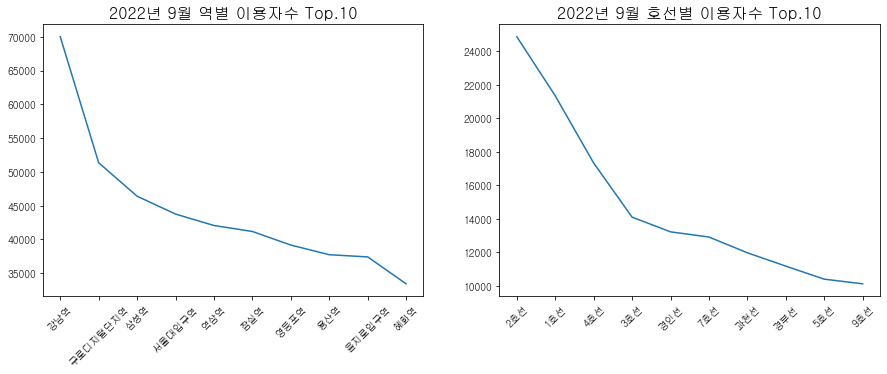

In [13]:
fig = plt.figure(figsize = (15, 5))

ax1 = fig.add_subplot(121)
ax1.plot(mean_station.iloc[:10])
ax1.tick_params(axis = 'x', rotation = 45)
ax1.set_title('2022년 9월 역별 이용자수 Top.10', fontsize = 16)

ax2 = fig.add_subplot(122)
ax2.plot(mean_num.iloc[:10])
ax2.tick_params(axis = 'x', rotation = 45)
ax2.set_title('2022년 9월 호선별 이용자수 Top.10', fontsize = 16)

plt.show()